# Метод двух указателей

Заданы число и отсортированный список из целых чисел. Напишите функцию, которая найдёт в этом списке два элемента, сумма которых равна заданному числу, и вернёт кортеж с индексами этих элементов. Нельзя использовать один и тот же элемент дважды. Если при определённых входных данных решения у задачи нет, функция должна вернуть None.

Например: задано число 10; задан список [1, 2, 3, 4, 5, 6, 7, 11].

Один из способов, позволяющих отбрасывать заведомо неподходящие варианты, — это **метод двух указателей**. Он применяется в ситуациях, когда данные хранятся в отсортированном массиве и необходимо найти в этом массиве значения, отвечающие определённым условиям, — например, заданную сумму двух элементов, как в приведённой задаче. Тем же методом можно найти, например, срез массива, где сумма значений будет равна заданному числу.

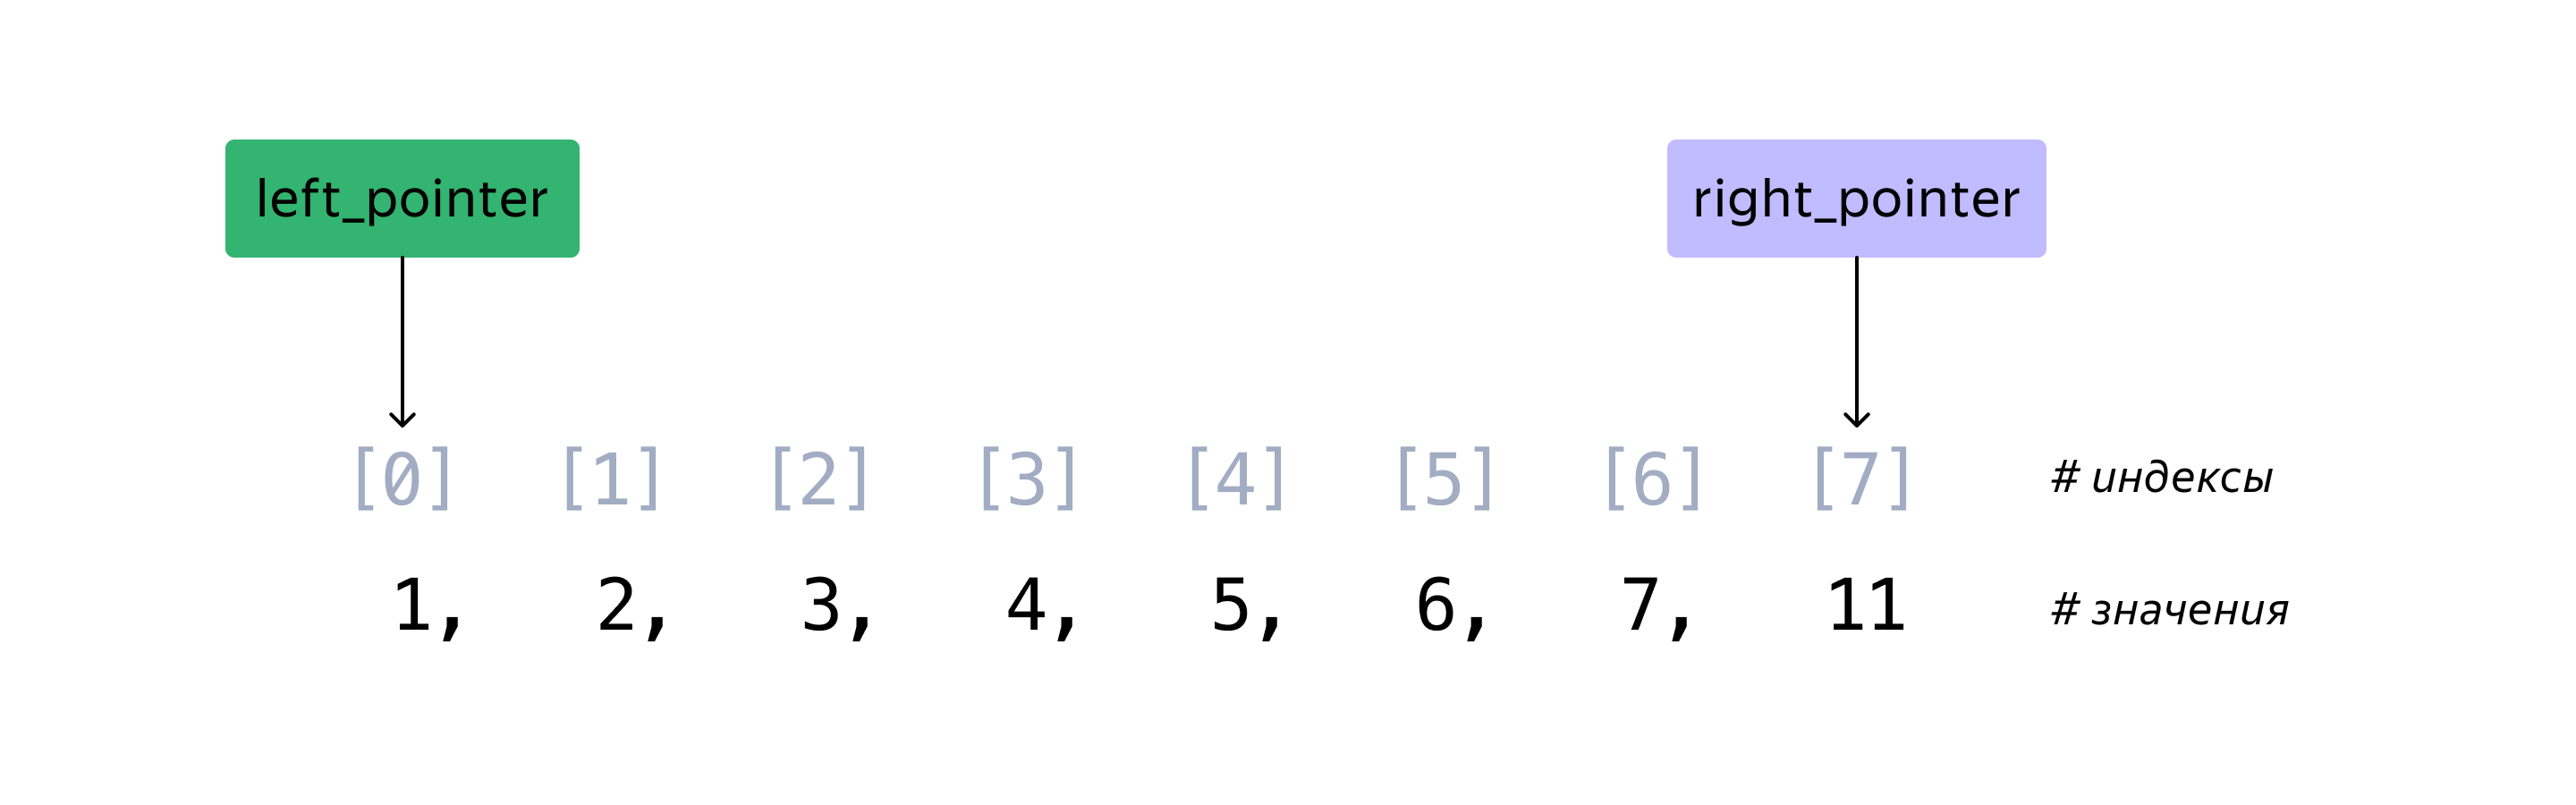

Для работы создаются два указателя: левый `left_pointer` и правый `right_pointer`. Каждый из указателей «наведён» на определённый элемент массива — хранит индекс этого элемента. В самом начале работы указатель `left_pointer` указывает на первый элемент массива, а `right_pointer` — на последний.

```Python
data = [1, 2, 3, 4, 5, 6, 7, 11]
# Указатели хранят индексы определённых элементов массива, 
# "указывают" на эти элементы.
# В начале работы указатели хранят первый и последний индексы массива.
left_pointer = data[0]
right_pointer = data[len(data) - 1] 
```

Алгоритм выполняется пошагово:

1. Установили указатели на определённые индексы.
2. Сравнили сумму значений элементов, на которые смотрят указатели.
3. В зависимости от результатов сравнения сдвинули один из указателей на один элемент ближе к середине массива.
4. Повторили все операции.

В ходе работы индекс левого указателя может только увеличиваться, а индекс правого — только уменьшаться; указатели смещаются навстречу друг другу, к середине массива.

Отрезок массива, «зажатый» между указателями, с каждым шагом уменьшается. Значения, оказавшиеся вне этого отрезка, признаются «бесперспективными», отбрасываются

Сумма наименьшего и наибольшего значений **больше** искомой суммы, значит, правый указатель указывает на слишком большое значение, оно точно не подходит.

Сдвигаем правый указатель на одну позицию влево. «Правое» значение станет меньше, и сумма элементов, на которые «смотрят» указатели, тоже уменьшится.

В нашей задаче метод двух указателей работает так:

- Если сумма двух элементов, на которые «смотрят» указатели, больше искомого значения, то сумму надо уменьшить (взять меньшее слагаемое). Сдвигаем правый указатель влево, уменьшая сумму.
- Если сумма меньше искомого значения, сдвигаем левый указатель вправо, чтобы увеличить сумму значений.
- Если указатели «встретились», у задачи нет решения. Один элемент нельзя использовать дважды, а при «встрече» оба указателя укажут на один элемент.
- Если левый указатель окажется правее правого, он сам превратится в правый, и начнётся перебор уже рассмотренных вариантов. Такой вариант надо исключить.



In [2]:
def two_pointer_method(expected_sum, data):
    left_pointer = 0
    right_pointer = len(data) - 1
    while left_pointer < right_pointer:
        result = data[left_pointer] + data[right_pointer]
        if result == expected_sum:
            return (left_pointer, right_pointer)
        elif result > expected_sum:
            right_pointer -= 1
        else:
            left_pointer += 1

print(two_pointer_method(10, [1, 2, 3, 4, 5, 6, 7, 11]))

(2, 6)


В этом решении применён цикл while, а не for: ведь количество необходимых шагов заранее неизвестно, но зато известны два возможных условия выхода из цикла:
- когда найдётся искомое число,
- или когда указатели встретятся.

За одну итерацию цикла сдвигается только один указатель, значит, указатели никак не смогут «разминуться» друг с другом или перескочить один через другой. 

Временная сложность такого решения задачи — линейная, а не квадратичная, как было в случае наивного решения. Никаких новых объектов при таком решении не создаётся — следовательно, нет и дополнительного расхода памяти.